In [1]:
import logging
import os
import sys
import time

import numpy as np
import matplotlib.pyplot as plt
import pykeen
from pykeen.kge_models import ERMLP

In [2]:
%matplotlib inline

In [3]:
logging.basicConfig(level=logging.INFO)
logging.getLogger('pykeen').setLevel(logging.INFO)

In [4]:
print(sys.version)

3.7.1 (default, Nov  6 2018, 18:45:35) 
[Clang 10.0.0 (clang-1000.11.45.5)]


In [5]:
print(time.asctime())

Mon Apr  1 14:09:17 2019


Check which hyper-parameters are required by ERMLP:

In [6]:
ERMLP.hyper_params

['embedding_dim', 'margin_loss', 'learning_rate']

Define output directory:

In [7]:
output_directory = os.path.join(
    os.path.expanduser('~'), 
    'Desktop', 
    'pykeen_test'
)

Define hyper-parameters:

In [13]:
config = dict(
    training_set_path           = '/Users/mehdi/PycharmProjects/PyKEEN/data/corpora_local/rdf.nt',
    execution_mode              = 'Training_mode',
    random_seed                 = 0,
    kg_embedding_model_name     = 'ERMLP',
    embedding_dim               = 50,
    margin_loss                 = 1,
    learning_rate               = 0.1,
    num_epochs                  = 10,  
    batch_size                  = 64,
    preferred_device            = 'cpu'
)

Train ERMLP:

In [14]:
results = pykeen.run(
    config=config,
    output_directory=output_directory,
)

INFO:pykeen.utilities.pipeline:-------------Train KG Embeddings-------------
Training epoch: 100%|██████████| 10/10 [00:00<00:00, 149.86it/s]


Check result entries:

In [15]:
results.results.keys()

odict_keys(['trained_model', 'losses', 'entity_to_embedding', 'relation_to_embedding', 'entity_to_id', 'relation_to_id', 'final_configuration'])

Access trained model:

In [16]:
results.results['trained_model']

ERMLP(
  (criterion): MarginRankingLoss()
  (entity_embeddings): Embedding(89, 50)
  (relation_embeddings): Embedding(24, 50)
  (mlp): Sequential(
    (0): Linear(in_features=150, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
    (3): Linear(in_features=50, out_features=1, bias=True)
  )
)

Visualize loss values:

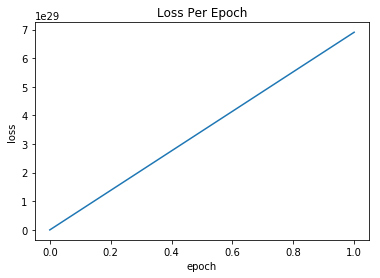

In [17]:
losses = results.results['losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()